<a href="https://colab.research.google.com/github/leap-stc/LEAPCourse-Climate-Pred-Challenges/blob/main/Project-StarterCodes/Project1-Notebook/tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**
+ Description of project, link
+ Purpose of this notebook
+ How to use this as starter codes

#Step 0: Setup workspace

Setup a subfolder for downloaded raw data and another subfolder for outputs.

# Step 1: Install packages, import packages and download data


## 1.1 Packages

Short descriptions for the packages.

In [ ]:
%%capture
!pip uninstall --yes cartopy
!pip uninstall --yes shapely
!pip install shapely cartopy --no-binary shapely --no-binary cartopy
!pip install gender_guesser

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import urllib.request
import warnings
import gender_guesser.detector as gender
from numpy import linalg as LA
from sklearn.cluster import k_means
from collections import Counter
warnings.filterwarnings('ignore')

## 1.2 Data

Useful links to read more about data:

* [Official website for IBTrACS](https://www.ncdc.noaa.gov/ibtracs/).

* [Tracks in other basins for IBTrACs (other than NA)](https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/netcdf/)

* Another source of data: [HURDAT2](https://oasishub.co/dataset/hurdat-2-atlantic-hurricane-database/resource/2c865c53-3fc3-4e16-9ef5-0d76a47cfcf3)

The data downloaded below covers the tracks in the basin 'NA' (North America).

*   General documentation of the data: https://www.ncdc.noaa.gov/ibtracs/pdf/IBTrACS_version4_Technical_Details.pdf
*   Detailed documentation on columns: https://www.ncdc.noaa.gov/ibtracs/pdf/IBTrACS_v04_column_documentation.pdf


In [ ]:
# Download the needed track file
filedata = urllib.request.urlopen('https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/netcdf/IBTrACS.NA.v04r00.nc')
datatowrite = filedata.read()
 
with open('/content/NA_data.nc', 'wb') as f:
    f.write(datatowrite)

Now, check the fold icon on the left of your screen to see if the data `NA_data.nc` has been saved. 

# Step 2: visualization of hurricane tracks






Explain the organization of this section.

## 2.1 Visualization function

A short description

In [ ]:
def map_background(label=False, extent=[-100, 0, 0, 60]):
  # A helpder function for creating the map background.
  # INPUT:
  # "extent": corresponds to the location information of the showed map.
  # "label": boolean

  # OUTPUT:
  # Matplotlib AXES object

  plt.figure(figsize = (20, 10))
  ax = plt.axes(projection=ccrs.PlateCarree())
  ax.coastlines()
  ax.set_extent(extent)
  ax.gridlines(draw_labels=label) # show labels or not
  LAND = cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                      edgecolor='face', 
                                      facecolor=cfeature.COLORS['land'],
                                          linewidth=.1)
  OCEAN = cfeature.NaturalEarthFeature('physical', 'ocean', '10m',
                                       edgecolor='face', 
                                       facecolor=cfeature.COLORS['water'], linewidth=.1)
  ax.add_feature(LAND, zorder=0)
  ax.add_feature(OCEAN)
  return ax

##2.2 A simple example using the function. 

Here, we plot a line between two Stanford and Berkeley using the above function.

Text(-122.1461, 37.4041, 'Stanford')

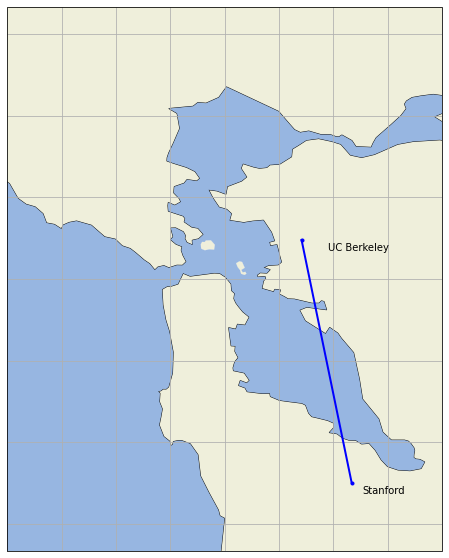

In [ ]:
ax = map_background(extent=[-122.8, -122, 37.3, 38.3])

berkeley_lon, berkeley_lat = -122.2585, 37.8719
stanford_lon, stanford_lat = -122.1661, 37.4241

# plot the two universities as blue dots
ax.plot([berkeley_lon, stanford_lon], [berkeley_lat, stanford_lat],
         color='blue', linewidth=2, marker='.')
ax.text(berkeley_lon + 0.16, berkeley_lat - 0.02, 'UC Berkeley',
         horizontalalignment='right')
ax.text(stanford_lon + 0.02, stanford_lat - 0.02, 'Stanford',
         horizontalalignment='left')

## 2.3 Working with xarray data. 

Run the code below to see an example of information that can be obtained from the original data.

[TODO] add the xarray data structure.

+ Xarray documentation: https://xarray.pydata.org/en/stable/user-guide/terminology.html
+ Read more about data: https://earth-env-data-science.github.io/lectures/data.html

In the following, we carry out the following operations on our data, which is an xarray, which are also annotated in the codes.

+ ... 


In [ ]:
tks = xr.open_dataset('NA_data.nc', engine="netcdf4", decode_times=False)
storm_num = tks.dims['storm'] # how many tracks in total
# Notice that the dimension 'quadrant' is often not used, which can be dropped if wanted.
print(f"\nDimension of the dataset is {dict(tks.dims)}")
print(f"\nIn total, there are {storm_num} track records.")
print(f"\nThe attributes of this dataset are:\n {list(tks.attrs.keys())}")


# starting and ending season (year)
min_year = np.min(list(tks.season))
max_year =  np.max(list(tks.season)) 
print(f"\nTrack records start in year {min_year} and ends in year {max_year}")

print('\nAll variables in this dataset:') # see documentation above
print(list(tks.keys())) # variables

storm_1 = tks.sel(storm=2000) # notice that the first storm starts with 0 not 1
name = str(storm_1.name.values)[2:-1] # use this trick to obtain the name string
sid = str(storm_1.sid.values,'UTF-8')
print(f"\nThe 2001st hurricane, named {name}, has a record of {int(storm_1.numobs)} \
observations with sid {sid} in year {int(storm_1.season)}.")



Dimension of the dataset is {'date_time': 360, 'quadrant': 4, 'storm': 2293}

In total, there are 2293 track records.

The attributes of this dataset are:
 ['title', 'summary', 'source', 'Conventions', 'Conventions_note', 'product_version', 'project', 'processing_level', 'acknowledgement', 'references', 'institution', 'publisher_type', 'publisher_name', 'publisher_email', 'publisher_institution', 'publisher_url', 'creator_type', 'creator_name', 'creator_institution', 'creator_email', 'creator_url', 'contributor_name', 'contributor_role', 'date_created', 'date_issued', 'time_coverage_start', 'time_coverage_end', 'geospatial_lat_min', 'geospatial_lat_max', 'geospatial_lat_units', 'geospatial_lat_resolution', 'geospatial_lon_min', 'geospatial_lon_max', 'geospatial_lon_units', 'geospatial_lon_resolution', 'geospatial_vertical_min', 'geospatial_vertical_max', 'naming_authority', 'id', 'metadata_link', 'keywords', 'keywords_vocabulary', 'standard_name_vocabulary', 'history', 'license', 'fea

##2.4 Function to visualize one track

We use asterisk and X to denote the birth and death points of a track.

In [ ]:
# These are helper functions to conveniently plot one single track.
def get_lon_lat(storm):
  lon_lst = storm.lon.values
  lat_lst = storm.lat.values
  return lon_lst[~np.isnan(lon_lst)], lat_lst[~np.isnan(lat_lst)]

# !!! Note that even though it's a convention to place latitude before longitude, 
# to work with cartopy projection, longitude MUST be placed first. !!!
def plot_one_track(ax, storm, color='blue', all_track=True, marker_color='black'):
  # INPUT: 
  # ax: Matplotlib axes object 
  # storm: a Xarray DATASET object (this can be adjusted if desired)
  # all_track: plot the whole track or just the origin

  # OUTPUT:
  # None
  
  lon_lst, lat_lst = get_lon_lat(storm)
  year = storm.season.values
  if all_track:
    ax.plot(lon_lst, lat_lst, '-o', color=color, linewidth=2, markersize=3) # marker='.'
    ax.plot(lon_lst[-1], lat_lst[-1], color=marker_color, marker='x', markersize=10)
  ax.plot(lon_lst[0], lat_lst[0], color=marker_color, marker='*', markersize=10)
  ax.text(lon_lst[0], lat_lst[0]-2, str(storm.name.values)[2:-1], horizontalalignment='center')


## 2.5 Visualize all tracks in 2000.



There are 19 storms in the year 2000.



Text(0.5, 1.0, 'Tracks in year 2000')

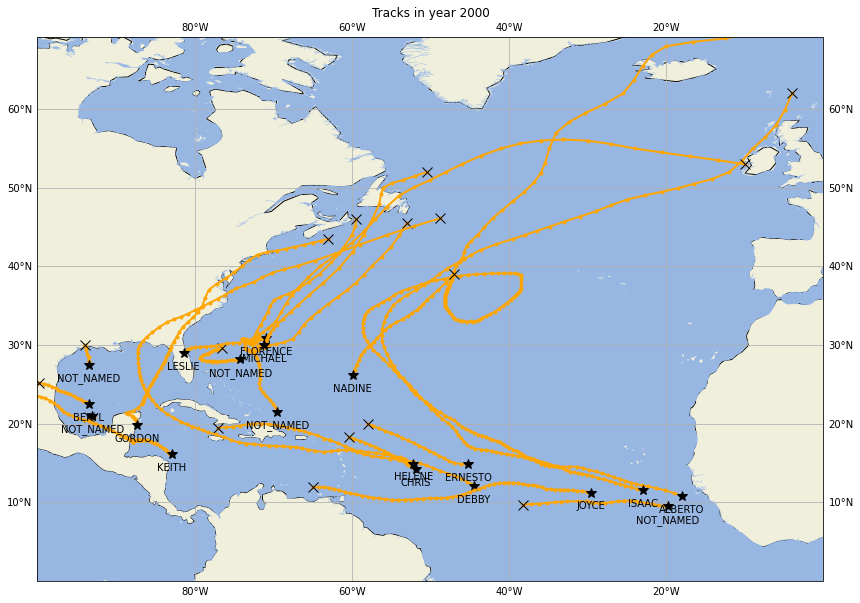

In [ ]:
year=2000 # Change this to see tracks from other years.
storms = tks.where(tks.season==2000, drop=True) # select the hurricanes that happened in year 2000
print(f"There are {storms.dims['storm']} storms in the year {year}.\n")
storm_num = storms.dims['storm']
ax = map_background(extent=[-100, 0, 0, 60], label=True)

for ind in range(storm_num): 
  storm = storms.sel(storm=ind)
  plot_one_track(ax, storm, color='orange')
plt.title(f"Tracks in year {year}")
# plt.legend()

# Step 3: Analyze Tracks 

Here we use moment as a numerical characteristic of a track, as in xxx (year). 

## 3.1 What is moment?

See wiki's description about Ophelia: https://en.wikipedia.org/wiki/Hurricane_Ophelia_(2005).

Below codes plot ONE track and its moments based on the paper's idea.

$$
\begin{aligned}
\mathbf{M 1}&=\frac{1}{A} \int w(\mathbf{r}) \mathbf{r} d x d y=\frac{1}{\sum_{i=1}^{n} w\left(r_{i}\right)} \sum_{i=1}^{n} w\left(\mathbf{r}_{i}\right) \mathbf{r}_{i} \\
\mathbf{M 2} &=\frac{1}{A} \int w(\mathbf{r})(\mathbf{r}-\mathbf{M 1})^{2} d x d y 
=\frac{1}{\sum_{i=1}^{n} w\left(r_{i}\right)} \sum_{i=1}^{n} w\left(\mathbf{r}_{i}\right)\left(\mathbf{r}_{i}-\mathbf{M 1}_{i}\right)^{2}
\end{aligned}
$$

If the later expression has the weights set to be one, it's the same as the covariance matrix.

## 3.2 Function to calculate moment for a hurricane


In [ ]:
def get_moments(storm):
  # A function to calculate the track moments given a storm
  # OUTPUT:
  # X-centroid, Y-centroid, X_var, Y_var, XY_var

  # Note that:
  # In this case, no weights are set. In other words, all weights are 1.
  # This can be adjusted to explore different results

  lon_lst, lat_lst = get_lon_lat(storm)
  # If the track only has one point, there is not point in calculating the moments
  if len(lon_lst)<= 1: return None 
  lon_weighted, lat_weighted = np.mean(lon_lst), np.mean(lat_lst)
  cv = np.ma.cov([lon_lst, lat_lst])
  return [lon_weighted, lat_weighted, cv[0, 0], cv[1, 1], cv[0, 1]]

## 3.3 Calculate and visualize moment for a hurricane track 

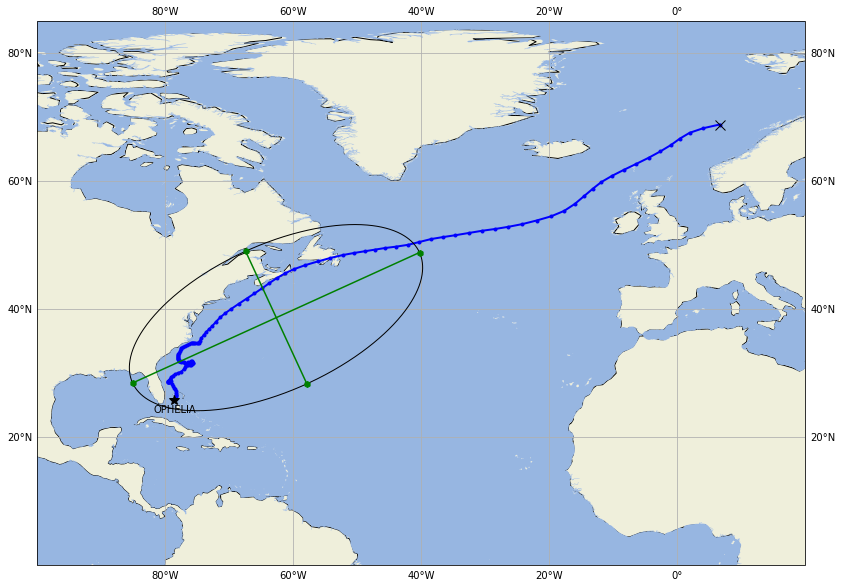

In [ ]:
storm = tks.sel(storm=2000) 
lon_weighted, lat_weighted, lon_var, lat_var, xy_var = get_moments(storm)

# Rotate the circle and calculate points on the circle
# Set N larger to make the oval more precise and to consume more electricity
N=1000 
t = np.linspace(0, 2 * np.pi, N)
circle = [np.sqrt(lon_var) * np.cos(t), np.sqrt(lat_var) * np.sin(t)]
_, R_rot = LA.eig(np.array([[lon_var, xy_var], [xy_var, lat_var]]))
circle = np.dot(R_rot, circle)
R_1, R_2 = circle[0, :] + lon_weighted, circle[1, :] + lat_weighted

# Plot 
ax = map_background(extent=[-100, 20, 0, 80], label=True)
plot_one_track(ax, storm)
ax.plot(R_1, R_2, '-', color='black', linewidth=1)
ax.plot([circle[0,0], circle[0,int(N/2)]]+lon_weighted, 
        [circle[1,0], circle[1,int(N/2)]]+lat_weighted, '-gh')
ax.plot([circle[0,int(N/4)], circle[0,int(N*3/4)]]+lon_weighted, 
        [circle[1,int(N/4)], circle[1,int(N*3/4)]]+lat_weighted, '-gh')

## 3.4 K-means clustering using moments

In this section, K-means clustering is carried out on the historical tracks with the idea adopted from the paper. As the data are different, nuances with the clustering results are expected.

In [ ]:
# It takes a moment to calculate the moments.
moment_lst = [get_moments(tks.sel(storm=i)) for i in range(tks.dims['storm'])
              if get_moments(tks.sel(storm=i))]
print(np.shape(moment_lst))
print(f"There are {tks.dims['storm']-np.shape(moment_lst)[0]} tracks that have length less than 1.")

(2264, 5)
There are 29 tracks that have length less than 1.


[Elbow](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) values can be used to determine the optimal value of the clusters.

Text(0.5, 1.0, 'Elbow Method For Optimal k')

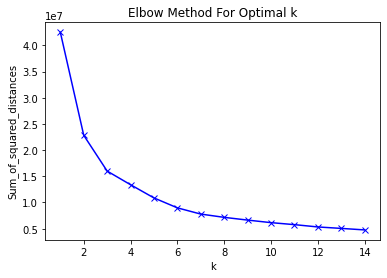

In [ ]:
sum_of_squares = []
K = range(1, 15)
for k in K:
    km = k_means(moment_lst, n_clusters=k)
    sum_of_squares.append(km[2])
plt.plot(K, sum_of_squares, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

From the plot above, 6 is probably a good choice for the number of clusters. \\

Below codes plot the K-means results. The locations on the map are the weighted longitude and longitude (sample mean in this case as the weights are set to 1).

2293


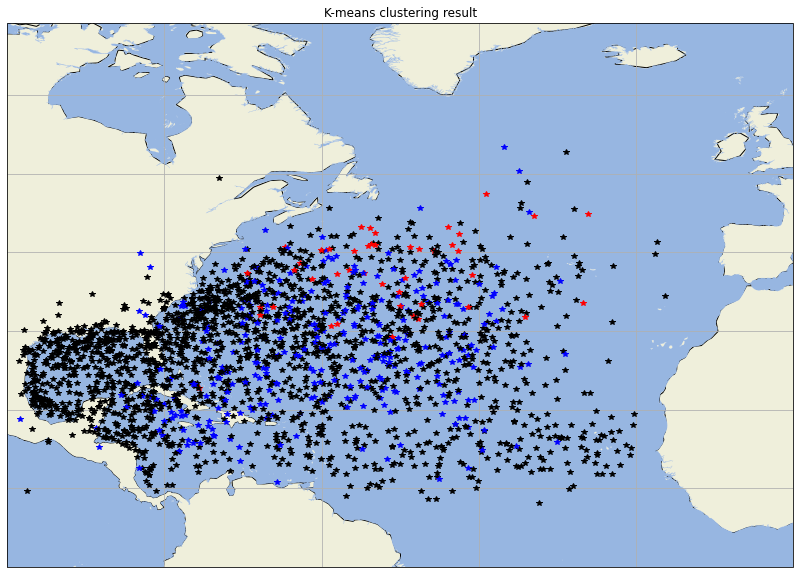

In [ ]:
km = k_means(moment_lst, n_clusters=6)
# print(km[0])

colors = ['black', 'red', 'blue', 'yellow', 'green', 'magenta']
labels = km[1]
ax = map_background()
for k in range(len(moment_lst)):
    ax.plot(moment_lst[k][0], moment_lst[k][1], c=colors[labels[k]]+1, marker='*')
plt.title('K-means clustering result')
print(storm_num)

## 3.5 Other Summary Statistics and example comparisons

Compare the $\Delta$ lon and $\Delta$ lat between these two interval of years (2000\~2010 against 1990\~1999). $\Delta$ lon can be defined as the maximum value of distance of the drift of a hurricane from its start to its end location in its longitude (same as the what [np.ptp](https://numpy.org/doc/stable/reference/generated/numpy.ptp.html) does).

194 storms between year 2000 and 2010,         133 storms between year 1990 and 1999.



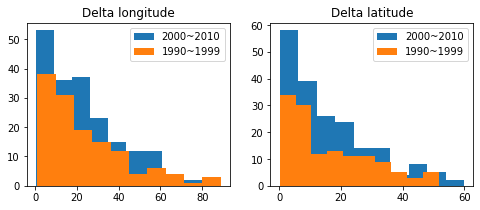

In [ ]:
def delta_lon_lat(storm):
  lon_lst, lat_lst = get_lon_lat(storm)
  return [np.ptp(lon_lst), np.ptp(lat_lst)]

storms_1 = tks.where((tks.season >= 2000) & (tks.season <= 2010), drop=True)
storms_2 = tks.where((tks.season >= 1990) & (tks.season <= 1999), drop=True)
N1, N2 = storms_1.dims['storm'], storms_2.dims['storm']
print(f"{storms_1.dims['storm']} storms between year 2000 and 2010, \
        {storms_2.dims['storm']} storms between year 1990 and 1999.\n")

d_lst_1 = [delta_lon_lat(storms_1.sel(storm=i)) for i in range(N1)]
d_lst_1 = np.transpose(d_lst_1)

d_lst_2 = [delta_lon_lat(storms_2.sel(storm=i)) for i in range(N2)]
d_lst_2 = np.transpose(d_lst_2)


fig, axs = plt.subplots(1,2,figsize=(8,3)) # gridspec_kw={'height_ratios': [1, 2]}

for j in range(2):
  axs[j].hist(d_lst_1[j], label='2000~2010')
  axs[j].hist(d_lst_2[j], label='1990~1999')
  axs[j].legend()
axs[0].title.set_text('Delta longitude')
axs[1].title.set_text('Delta latitude')



It can be seen from the above graphs that hurricanes are more volatile in recent years (2000\~2010) compared to earlier years (1990~1999). 



---


Below codes exam whether people are being sexist in naming the hurricanes. 

Note that in the output below, 'Andy' means it's a gender-neutral or an unisex name. 

The [gender.Detector](https://pypi.org/project/gender-guesser/) determines whether a hurricane name is female or male.

Ophelia is considered a female name.

In total there are 803 named hurricanes in record.



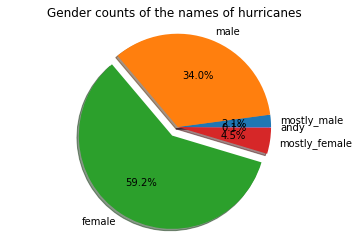

In [ ]:
d = gender.Detector(case_sensitive=False)
gen = d.get_gender("Ophelia")
print(f"Ophelia is considered a {gen} name.\n")

all_names = [str(name)[2:-1] for name in tks.name.values]
all_names = [x for x in all_names if x!='NOT_NAMED'] # clean the unnamed cases
print(f"In total there are {len(all_names)} named hurricanes in record.\n")

gender_lst = [d.get_gender(name) for name in all_names]
gender_lst = [x for x in gender_lst if x!='unknown'] # clean the unknown names

# Data (counts)
genders_category = Counter(gender_lst).keys()  # equals to list(set(list))
genders_count = Counter(gender_lst).values() # counts the elements' frequency
explode = [0.11 if x==max(genders_count) else 0 for x in genders_count]

# plot
fig1, ax1 = plt.subplots()
ax1.pie(genders_count, explode=explode, labels=genders_category, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  
ax1.title.set_text('Gender counts of the names of hurricanes')

From the plot above, we can see that people are definitely somewhat sexist in naming the hurricanes. Most of the hurricanes are deemed as females. Does this make people feel better?


\\

---



Below codes summarize the types of all the classified hurricanes in the record (in the NA basin).

Storm classification (see the documentation, this is not the unique way of classifying the tracks)


*   EX - Extratropical
*   HU - Hurricane
* LO - Low
* MH - ?
* SD - Subtropical depression
* SS - Subtropical storm
* TD - Tropical Depression
* TS - Tropical Storm
* TW - ?
* WV - Open Wave

In [ ]:
all_types = tks.mlc_class.values
print(np.shape(all_types))

(2293, 360)


Notice the shape is (2293, 360), indicating that the classification of each cyclone evolves along the 'date_time' axis. To define the class of one hurricane as a whole, we can define it as the one class that has the highest frequency throughout its lifetime. 




There are 562 hurricanes that had been classified for at least once on its path during its limited lifetime.



Text(0.5, 1.0, 'Counts of the classification of all the tracks')

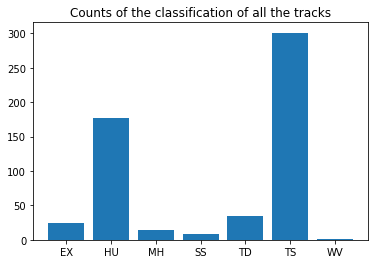

In [ ]:
class_lst = []

for i in range(tks.dims['storm']):
  types = [str(x)[2:-1] for x in all_types[i]]
  types = [x for x in types if x!='']
  # notice that most of the recorded tracks are not given a class
  if len(types)==0: continue
  class_category = Counter(types).most_common(1)[0][0] # Select the most frequent class
  class_lst.append(class_category)

print(f'There are {len(class_lst)} hurricanes that had been classified for at \
least once on its path during its limited lifetime.\n')

# This helps center the labels.
labels, counts = np.unique(class_lst, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('Counts of the classification of all the tracks')